In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')

In [11]:
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [12]:
data.tail()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0
43823,43824,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0


In [13]:
data.isna().any()

No       False
year     False
month    False
day      False
hour     False
pm2.5     True
DEWP     False
TEMP     False
PRES     False
cbwd     False
Iws      False
Is       False
Ir       False
dtype: bool

In [14]:
data['pm2.5'].isna().sum()

2067

In [3]:
data['pm2.5'].fillna(data['pm2.5'].median(), inplace=True)

In [17]:
data['pm2.5'].isna().sum()

0

In [18]:
duplicates = data.duplicated().sum()

In [21]:
duplicates

0

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   43824 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [23]:
data.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,97.357977,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,90.030249,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,31.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,132.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [4]:
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])

In [5]:
data.set_index('datetime', inplace=True)

In [53]:
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
datetime,,,,,,,,,,,,,
2010-01-01 00:00:00,1,2010,1,1,0,72.0,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,2010,1,1,1,72.0,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,2010,1,1,2,72.0,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,2010,1,1,3,72.0,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,5,2010,1,1,4,72.0,-20,-12.0,1018.0,NW,12.97,0,0


In [24]:
# visualization part 

In [30]:
dataset_columns = data.columns.tolist()
dataset_columns

['No',
 'year',
 'month',
 'day',
 'hour',
 'pm2.5',
 'DEWP',
 'TEMP',
 'PRES',
 'cbwd',
 'Iws',
 'Is',
 'Ir']

Text(0.5, 1.0, 'Air Quality, 2010-2015')

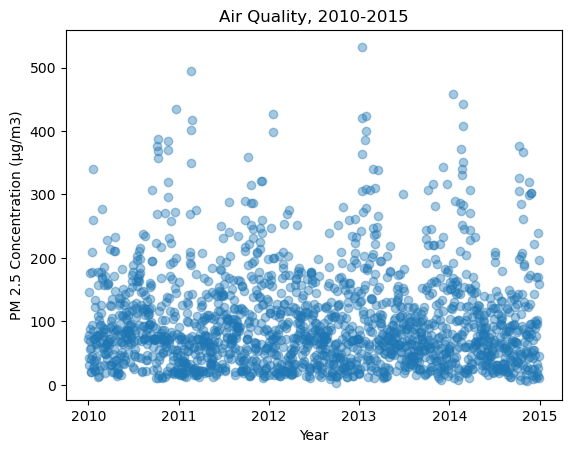

In [55]:
scatter_y = data['pm2.5'].resample('D').mean()
scatter_x = scatter_y.index
plt.scatter(x = scatter_x, y = scatter_y, alpha = 0.4)
plt.xlabel('Year')
plt.ylabel('PM 2.5 Concentration (μg/m3)')
plt.title('Air Quality, 2010-2015')

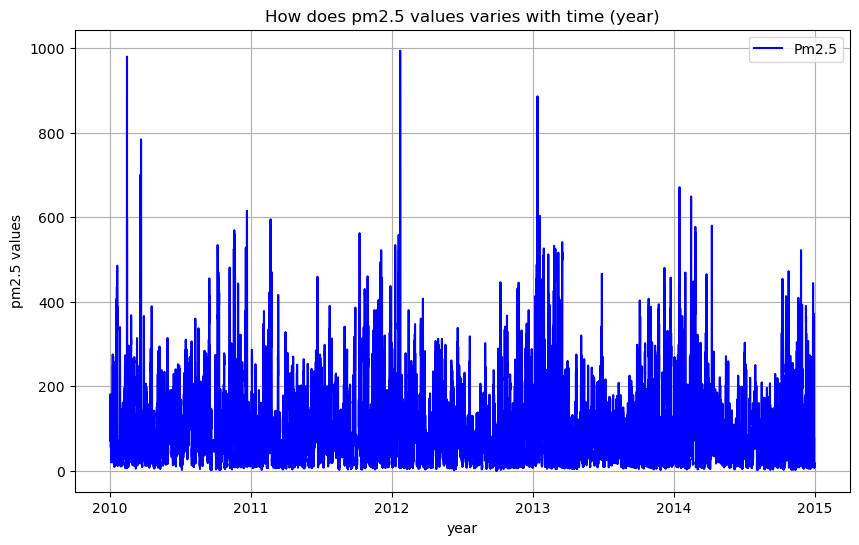

In [78]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['pm2.5'], label='Pm2.5', color='blue')
plt.title('How does pm2.5 values varies with time (year)')
plt.xlabel('year')
plt.ylabel('pm2.5 values')
plt.legend()
plt.grid(True)
plt.show()

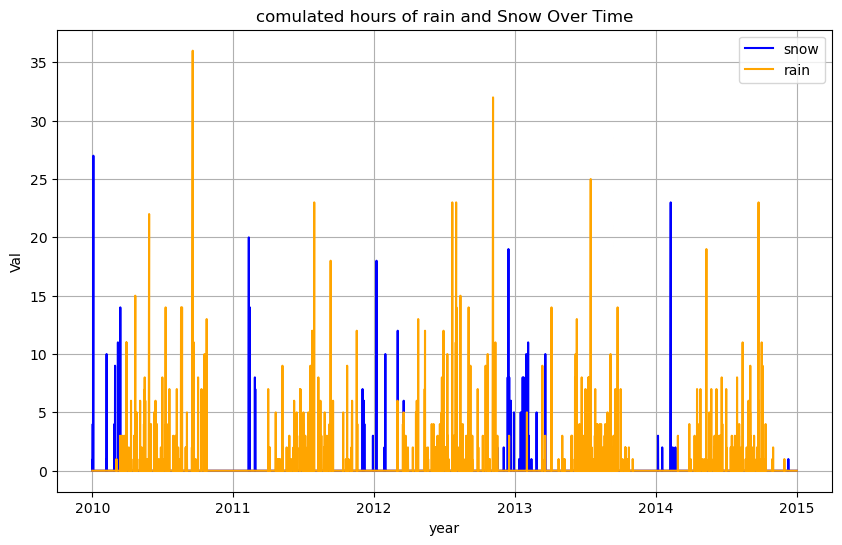

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Is'], label='snow', color='blue')
plt.plot(data.index, data['Ir'], label='rain', color='orange')
plt.title('comulated hours of rain and Snow Over Time')
plt.xlabel('year')
plt.ylabel('Val')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
df = pd.DataFrame(data)

In [10]:
# spliting our data into x and y 
x = data[['DEWP','TEMP','PRES','Iws','Is','Ir']]
y = data['pm2.5']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
std_sc=StandardScaler()
x_train=std_sc.fit_transform(x_train)
x_test=std_sc.fit_transform(x_test)

In [87]:
len(x_train)

35059

In [88]:
x_train

array([[ 0.77484804,  0.29172431, -0.33894809, -0.44295694, -0.06891923,
        -0.13803269],
       [ 0.429176  ,  0.29172431, -0.14426232,  0.84725422, -0.06891923,
        -0.13803269],
       [-0.12389925, -0.69078982, -0.33894809,  3.54535117, -0.06891923,
        22.18274226],
       ...,
       [ 0.22177278,  0.37360049, -0.14426232,  0.84765515, -0.06891923,
        -0.13803269],
       [-1.02264655, -1.42767542,  1.41322379, -0.29962242, -0.06891923,
        -0.13803269],
       [ 0.49831041, -0.28140893,  0.34245209, -0.46099905, -0.06891923,
        -0.13803269]])

In [89]:
len(x_test)

8765

In [90]:
x_test

array([[ 1.19399157,  1.03028597, -1.10345417, -0.43792047, -0.07132381,
        -0.13677075],
       [-0.83299586, -1.19416733,  1.82341059, -0.37575935, -0.07132381,
        -0.13677075],
       [-1.46206093, -1.93565176,  1.62828627, -0.4377225 , -0.07132381,
        -0.13677075],
       ...,
       [-1.7416454 , -1.4413288 ,  2.40878354, -0.37575935, -0.07132381,
        -0.13677075],
       [-0.76309974, -1.11178017,  0.45754037, -0.45553938, -0.07132381,
        -0.13677075],
       [ 0.42513427, -0.0407471 ,  0.06729173, -0.18096146, -0.07132381,
        -0.13677075]])

In [91]:
len(y_test)

8765

In [92]:
y_test

datetime
2012-06-21 08:00:00    193.0
2010-03-07 10:00:00     57.0
2014-01-13 07:00:00    106.0
2012-08-13 23:00:00     47.0
2013-09-21 06:00:00     34.0
                       ...  
2014-03-12 16:00:00     13.0
2012-02-26 01:00:00     70.0
2013-01-03 16:00:00     24.0
2011-03-11 05:00:00     26.0
2011-09-21 07:00:00     58.0
Name: pm2.5, Length: 8765, dtype: float64

In [93]:
len(y_train)

35059

In [94]:
y_train

datetime
2010-10-05 22:00:00    152.0
2012-09-03 21:00:00      9.0
2012-11-04 16:00:00     23.0
2010-03-08 04:00:00     63.0
2011-02-10 17:00:00     79.0
                       ...  
2010-09-19 01:00:00     45.0
2011-04-16 04:00:00     72.0
2014-05-09 22:00:00     59.0
2010-02-05 20:00:00     67.0
2011-10-21 03:00:00    282.0
Name: pm2.5, Length: 35059, dtype: float64

In [101]:
# tarining models

In [102]:
# 1. ridge regression 

In [19]:
ridge = Ridge(alpha=1.0)

In [20]:
ridge.fit(x_train, y_train)

Ridge()

In [21]:
y_pred = ridge.predict(x_test)

In [22]:
x_train_pred = ridge.predict(x_train)
x_test_pred = ridge.predict(x_test)

In [23]:
train_mse = mean_squared_error(y_train, x_train_pred)
test_mse = mean_squared_error(y_test, x_test_pred)

In [108]:
print(f'Training Mean Squared Error: {train_mse:.2f}')
print(f'Test Mean Squared Error: {test_mse:.2f}')

Training Mean Squared Error: 6317.49
Test Mean Squared Error: 6168.01


In [24]:
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

In [110]:
print(f'Training Root Mean Squared Error: {train_rmse:.2f}')
print(f'Test Root Mean Squared Error: {test_rmse:.2f}')

Training Root Mean Squared Error: 79.48
Test Root Mean Squared Error: 78.54


In [25]:
train_r2 = r2_score(y_train, x_train_pred)
test_r2 = r2_score(y_test, x_test_pred)

In [113]:
print(f'Training R² Score: {train_r2:.2f}')
print(f'Test R² Score: {test_r2:.2f}')

Training R² Score: 0.22
Test R² Score: 0.23


In [27]:
# random forest method 
len(y)

43824

In [28]:
y.isna().sum()

0

In [29]:
y.fillna(y.median(), inplace=True)

In [30]:
rf= RandomForestRegressor(n_estimators=100, random_state=42)

In [31]:
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
y_pred = rf.predict(x_test)

In [33]:
y_pred

array([ 79.811     , 106.47      ,  98.73      , ...,  19.61      ,
       163.75183333, 132.56      ])

In [33]:
y_test_array = np.array(y_test)
y_test_array

array([193.,  57., 106., ...,  24.,  26.,  58.])

In [34]:
x_train_pred = rf.predict(x_train)
x_test_pred = rf.predict(x_test)

In [35]:
x_test

array([[ -20.  ,   -8.  , 1017.  ,   27.28,    0.  ,    0.  ],
       [ -10.  ,   -9.  , 1024.  ,   84.92,   11.  ,    0.  ],
       [ -11.  ,   -9.  , 1021.  ,  105.93,   17.  ,    0.  ],
       ...,
       [ -22.  ,   -5.  , 1034.  ,  143.03,    0.  ,    0.  ],
       [ -22.  ,   -5.  , 1034.  ,  150.18,    0.  ,    0.  ],
       [ -22.  ,   -3.  , 1034.  ,  242.7 ,    0.  ,    0.  ]])

In [29]:
x_test_pred

array([ 79.811     , 106.47      ,  98.73      , ...,  19.61      ,
       163.75183333, 132.56      ])

In [35]:
train_mse = mean_squared_error(y_train, x_train_pred)
test_mse = mean_squared_error(y_test, x_test_pred)

In [15]:
print(f'Training Mean Squared Error: {train_mse:.2f}')
print(f'Test Mean Squared Error: {test_mse:.2f}')

Training Mean Squared Error: 1002.81
Test Mean Squared Error: 5108.00


In [36]:
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

In [17]:
print(f'Training Root Mean Squared Error: {train_rmse:.2f}')
print(f'Test Root Mean Squared Error: {test_rmse:.2f}')

Training Root Mean Squared Error: 31.67
Test Root Mean Squared Error: 71.47


In [37]:
train_r2 = r2_score(y_train, x_train_pred)
test_r2 = r2_score(y_test, x_test_pred)

In [19]:
print(f'Training R² Score: {train_r2:.2f}')
print(f'Test R² Score: {test_r2:.2f}')

Training R² Score: 0.88
Test R² Score: 0.36


In [ ]:
x_train_pred_new = knn.predict(x_train_new)
x_test_pred_new = knn.predict(x_test_new)
train_accuracy = accuracy_score(y_train, x_train_pred_new)
test_accuracy = accuracy_score(y_test, x_test_pred_new)

In [24]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
train_scores = []
test_scores = []
for train_index, test_index in kfold.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rf.fit(x_train, y_train)
    train_score = rf.score(x_train, y_train)
    train_scores.append(train_score)
    
    test_score = rf.score(x_test, y_test)
    test_scores.append(test_score)
print(f'Mean training accuracy: {np.mean(train_scores):.2f}')
print(f'Mean test accuracy: {np.mean(test_scores):.2f}')

Mean training accuracy: 0.87
Mean test accuracy: 0.36
